# Lecture 4: Implicit Finite Difference Schemes and Solving Linear Systems

In [1]:
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import Image

from IPython.core.display import HTML
def header(text):
    raw_html = '<h4>' + str(text) + '</h4>'
    return raw_html

def box(text):
    raw_html = '<div style="border:1px dotted black;padding:2em;">'+str(text)+'</div>'
    return HTML(raw_html)

def nobox(text):
    raw_html = '<p>'+str(text)+'</p>'
    return HTML(raw_html)

def addContent(raw_html):
    global htmlContent
    htmlContent += raw_html
    
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 18,
        }



<p class='alert alert-success'>
Solve the questions in green blocks. Save the file as ME249-Lecture-4-YOURNAME.ipynb and change YOURNAME in the bottom cell. Send the instructor and the grader the <b>html</b> file not the ipynb file. 
</p>

## Test Function u

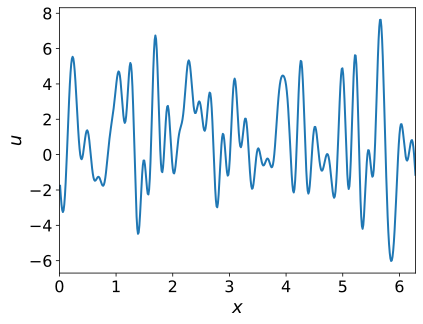

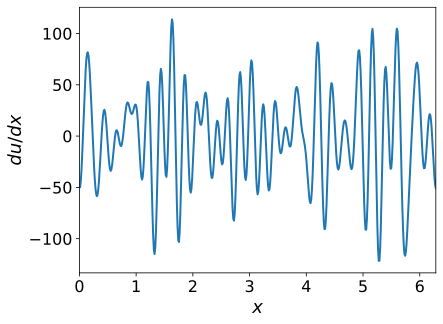

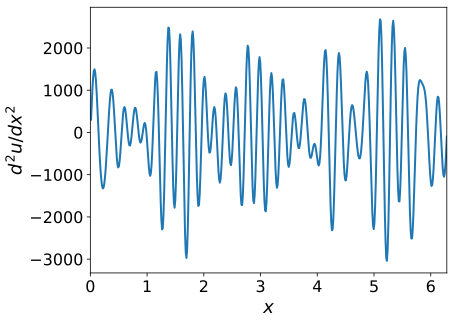

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Lx = 2.*np.pi
Nx = 512
u = np.zeros(Nx,dtype='float64')
du = np.zeros(Nx,dtype='float64')
ddu = np.zeros(Nx,dtype='float64')
k_0 = 2.*np.pi/Lx 
dx = Lx/Nx
x = np.linspace(dx,Lx,Nx)
Nwave = 33
uwave = np.zeros((Nx,Nwave),dtype='float64')
duwave = np.zeros((Nx,Nwave),dtype='float64')
dduwave = np.zeros((Nx,Nwave),dtype='float64')
ampwave = np.random.random(Nwave)
phasewave = np.random.random(Nwave)*2*np.pi
for iwave in range(Nwave):
    uwave[:,iwave] = ampwave[iwave]*np.cos(k_0*iwave*x+phasewave[iwave])
    duwave[:,iwave] = -k_0*iwave*ampwave[iwave]*np.sin(k_0*iwave*x+phasewave[iwave])
    dduwave[:,iwave] = -(k_0*iwave)**2*ampwave[iwave]*np.cos(k_0*iwave*x+phasewave[iwave])
u = np.sum(uwave,axis=1)
du = np.sum(duwave,axis=1)
ddu = np.sum(dduwave,axis=1)
#print(u)
plt.plot(x,u,lw=2)
plt.xlim(0,Lx)
#plt.legend(loc=3, bbox_to_anchor=[0, 1],
#           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$x$', fontdict = font)
plt.ylabel('$u$', fontdict = font)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()
plt.plot(x,du,lw=2)
plt.xlim(0,Lx)
#plt.legend(loc=3, bbox_to_anchor=[0, 1],
#           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$x$', fontdict = font)
plt.ylabel('$du/dx$', fontdict = font)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()
plt.plot(x,ddu,lw=2)
plt.xlim(0,Lx)
#plt.legend(loc=3, bbox_to_anchor=[0, 1],
#           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$x$', fontdict = font)
plt.ylabel('$d^2u/dx^2$', fontdict = font)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

<h2>Compact Finite Difference Schemes</h2>

The central compact finite difference scheme is defined as (in its general form):
<p class='alert alert-danger'>
$$
\beta f'_{i-2}+\alpha f'_{i-1}+f'_i+\alpha f'_{i+1}+\beta f'_{i+2}=
c\frac{f_{i+3}-f_{i-3}}{6\Delta}+b\frac{f_{i+2}-f_{i-2}}{4\Delta}+a\frac{f_{i+1}-f_{i-1}}{2\Delta}
$$
</p>
Note that if $\beta=\alpha=b=c=0$, the second order explicit central scheme is retrieved. Here we will limit our study to a tridagonal system:
$$
\alpha f'_{i-1}+f'_i+\alpha f'_{i+1}=a\frac{f_{i+1}-f_{i-1}}{2\Delta}
$$
and we wish to derive a fourth-order compact scheme.

The Taylor series expansion needed here are:

$$
f_{i\pm1}=f_i\pm\Delta f'_i+\frac{\Delta^2}{2!}f''_i\pm\frac{\Delta^3}{3!}f'''_i+\frac{\Delta^4}{4!}f^{(4)}_i+{\cal O}(\Delta^5)
$$
$$
f'_{i\pm1}=f'_i\pm\Delta f''_i+\frac{\Delta^2}{2!}f'''_i\pm\frac{\Delta^3}{3!}f^{(3)}_i+{\cal O}(\Delta^4)
$$

The goal is to find $\alpha$ and $a$ such that, the substitution of the Taylor series expansions above in the numerical scheme yields
$$
f'_i=f'_i+{\cal O}(\Delta^4)
$$

The left hand side develops into:
$$
\begin{split}
\alpha f'_{i-1}+f'_i+\alpha f'_{i+1}&=(1+2\alpha)f'_i\\
&+(-\alpha+\alpha)\Delta f''_i\\
&+\alpha\Delta^2f'''_i\\
&+(-\alpha+\alpha)\frac{\Delta^3}{3!}f^{(3)}_i+{\cal O}(\Delta^4)
\end{split}
$$
while the right hand side is:
$$
\begin{split}
a\frac{f_{i+1}-f_{i-1}}{2\Delta}&=(-a+a)\frac{1}{2\Delta}f_i\\
&+af'_i\\
&+(-a+a)\frac{\Delta}{2}f''_i\\
&+a\frac{\Delta^2}{3!}f'''_i\\
&+(-a+a)\frac{\Delta^3}{4!}f^{(4)}_i+{\cal O}(\Delta^4)
\end{split}
$$

Fourth order is achieved if:
$$
1+2\alpha=a
$$
and
$$
\alpha = \frac{a}{3!}
$$

<p class='alert alert-danger'>
The fourth order compact scheme is 
$$
\frac{1}{4} f'_{i-1}+f'_i+\frac{1}{4} f'_{i+1}=\frac{3}{2}\frac{f_{i+1}-f_{i-1}}{2\Delta}
$$
or
$$
 f'_{i-1}+4f'_i+ f'_{i+1}=3\frac{f_{i+1}-f_{i-1}}{\Delta}
$$
</p>

Consider a periodic function $f$ defined on $x\in[0,2\pi]$, discretized on a uniform mesh $x_i=i\Delta$ with $i=0,...,N-1$ and $\Delta=2\pi/(N)$. The system can be written in matrix form: 

$$
\left[
\begin{matrix}
4      & 1      &        &        &        &        &  1      \\
1      & 4      & 1      &        &        &        &         \\
       & \ddots & \ddots & \ddots &        &        &         \\
       &        & 1      & 4      & 1      &        &         \\
       &        &        & \ddots & \ddots & \ddots &         \\
       &        &        &        & 1      & 4      & 1       \\
1      &        &        &        &        & 1      & 4            
\end{matrix}
\right]
\left[
\begin{matrix}
f'_0\\
\vdots\\
f'_{i-1}\\
f'_i\\
f'_{i+1}\\
\vdots \\
f'_{N-1}
\end{matrix}
\right]=
\left[
\begin{matrix}
3(f_1-f_{N-1})/\Delta\\
\vdots\\
\vdots\\
3(f_{i+1}-f_{i-1})/\Delta\\
\vdots\\
\vdots \\
3(f_{0}-f_{N-2})/\Delta
\end{matrix}
\right]
$$

<p class='alert alert-success'>
Write the first and last element of the right hand side vector.
</p>

For the general central compact scheme, the order conditions can be derived by matching the Taylor series coefficients, as done above, yielding the following system:
<p class='alert alert-danger'>
$$
\begin{matrix}
a+b+c=1+2\alpha+2\beta & \text{2$^\text{nd}$ order} \\
a+2^2b+3^2c=2\cfrac{3!}{2!}(\alpha+2^2\beta) & \text{4$^\text{th}$ order}\\
a+2^4b+3^4c=2\cfrac{5!}{4!}(\alpha+2^4\beta) & \text{6$^\text{th}$ order}\\
a+2^6b+3^6c=2\cfrac{7!}{6!}(\alpha+2^6\beta) & \text{8$^\text{th}$ order}\\
a+2^8b+3^8c=2\cfrac{9!}{8!}(\alpha+2^8\beta) & \text{10$^\text{th}$ order}
\end{matrix}
$$
</p>

The modified wavenumber for a general central compact scheme is
<p class='alert alert-danger'>
$$
\omega^{mod}(\omega)=\frac{a\sin(\omega)+(b/2)\sin(2\omega)+(c/3)\sin(3\omega)}{1+2\alpha\cos(\omega)+2\beta\cos(2\omega)}
$$
</p>

<p class='alert alert-success'>
Plot the modified wavenumbers of the following schemes:
<ol>
<li> Second order explicit finite difference</li>
<li> Fourth order explicit finite difference</li>
<li> Fourth order compact</li>
<li> Sixth order compact with $\alpha=1/3$ and $\beta=c=0$</li>
<li> Tenth order compact with $\alpha=1/2$ and $\beta=1/20$</li>
</ol>
</p>

<p class='alert alert-success'>
Derive an third order upwind compact of the form:
$$
(2+a\epsilon)f'_{i-1}+8f'_i+(2-a\epsilon)f'_{i+1}=\frac{6}{\Delta}\left((1-b\epsilon)f_{i+1}+2\epsilon f_i-(1+b\epsilon)f_{i-1}\right)
$$
$a$ and $b$ are parameters to be found and $\epsilon$ is a parameter that takes the values $-1$, $1$ or $0$ depending on the flow directions. Verify that the scheme reverts to the fourth order central compact scheme when $\epsilon=0$
</p>

<h2>Solving a Linear system</h2>

<h3>Iterative Solution Methods</h3>

The goal is to solve a linear system of a vector $\vec{x}$ unknown variables:
$$
A\vec{x}=\vec{b}
$$
If the matrix A is invertible, the solution is simply $\vec{x}=A^{-1}\vec{b}$, however the inverse of $A$ may not always be easy to derive. The following describes a few iterative methods (used in CFD).

<h4> General Principle</h4>

Let $A=B-C$, where $B$ is invertible, the linear system becomes
$$
B\vec{x}=C\vec{x}+\vec{b}
$$
and the iterative solution is sought as
$$
B\vec{x}^{(n+1)}=C\vec{x}^{(n)}+\vec{b}
$$
where $n$ is the iteration index and $x^{(0)}$ is an initial guess. The assumption is that
$$
\lim_{n\rightarrow\infty}\vec{x}^{(n)}=\vec{x}
$$
Naturally, one hopes that $n$ is small enough to achieve an acceptable convergence defined by the error
$$
\vec{\epsilon}^{(n)}=\vec{x}-\vec{x}^{(n)}
$$
The linear system for the error can be derived as
$$
\vec{\epsilon}^{(n)}=(B^{-1}C)\vec{\epsilon}^{(n-1)}
$$
or
$$
\vec{\epsilon}^{(n)}=(B^{-1}C)^n\vec{\epsilon}^{(0)}
$$
Therefore the convergence criterion on the error depends on the eigenvalues $\lambda_i$ of $(B^{-1}C)$ and is guaranteed if the spectral radius
$$
\rho=\max_{i}\vert\lambda_i\vert\leq1
$$
The choice of $B$ and $C$ through the spectral radius $\rho$ governs the convergence rate of the iterative method.

<h4>Point Jacobi Method</h4>

The Jacobi method proposes that $B$ is the matrix $D$ formed by the diagonal elements of matrix $A=D+R$, where $R$ is the residual matrix containing all off-diagonal components. Providing that no element is zero, the iterative method is
$$
\vec{x}^{(n+1)}=D^{-1}(\vec{b}-R\vec{x}^{(n)})
$$
For the compact system, the Jacobi method becomes (let $\phi_i = f'_i$):
$$
\phi_i^{(n+1)}=-\frac{1}{4}\left(\phi_{i-1}^{(n)}+\phi_{i+1}^{(n)}\right)+\frac{1}{4}\left(\frac{3}{\Delta}\left(f_{i+1}-f_{i-1}\right)\right)
$$
Note that $R=L+U$, where $L$ and $U$ are the upper and lower triangle of matrix $A$ (without the diagonal). This decomposition will be useful later.

The index approach is written below. Make sure that you understand the code.

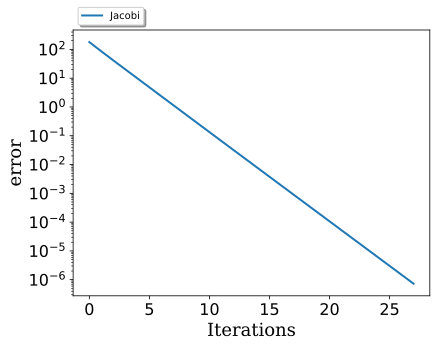

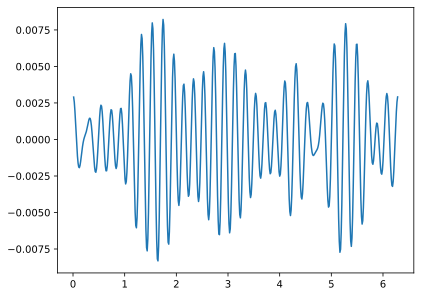

0.008315376213957393


In [3]:
Nitermax = 1000
it = 0
error_threshold = 1e-6
error = np.inf
phi = np.zeros(Nx)
phi_old = np.zeros(Nx)
error_jacobi = np.zeros(Nitermax)
b = np.zeros(Nx)
#generate rhs
b[1:Nx-1] = 0.75*(u[2:Nx]-u[0:Nx-2])/dx
b[0] = 0.75*(u[1]-u[Nx-1])/dx
b[Nx-1] = 0.75*(u[0]-u[Nx-2])/dx
for it in range(Nitermax):
    phi_old = np.copy(phi)
    phi[1:Nx-1] = -0.25*(phi_old[0:Nx-2] + phi_old[2:Nx]) \
                    +b[1:Nx-1]
    phi[0] = -0.25*(phi_old[1] + phi_old[Nx-1]) \
                    +b[0]
    phi[Nx-1] = -0.25*(phi_old[Nx-2] + phi_old[0]) \
                    +b[Nx-1]
    error_jacobi[it] = np.max(np.abs(phi-phi_old))
    if (error_jacobi[it] < error_threshold): break
    
#print(error)
it_jacobi = it
plt.semilogy(error_jacobi[0:it_jacobi+1],lw=2,label='Jacobi')
plt.xlabel('Iterations', fontdict = font)
plt.ylabel('error', fontdict = font)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.show()
plt.plot(x,phi-du)
plt.show()
print(np.max(np.abs(phi-du)))

This is the Matrix approach:

/var/folders/hd/msvhbc550t13nl54x1ft6rgw0000gp/T/ipykernel_89586/2048224376.py:32: RuntimeWarning: divide by zero encountered in divide
  phi = (b-np.dot(R,phi_old))/D


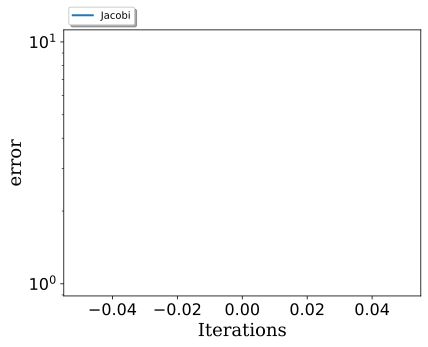

nan


In [4]:
Nitermax = 1000
it = 0
error_threshold = 1e-6
phi = np.zeros(Nx)
phi_old = np.zeros(Nx)
error_jacobi = np.inf*np.ones(Nitermax)
b = np.zeros(Nx)
A = np.zeros((Nx,Nx))
for i in range(Nx):
    if (i == 0):
        A[i,i] = 4.
        A[i,i+1] = 1.
        A[i,Nx-1] = 1.
        b[0] = 3./dx*(u[1] - u[Nx-1])
    elif (i == Nx-1):
        A[i,i-1] = 1.
        A[i,i] = 4.
        A[i,0] = 0.
        b[i] = 3./dx*(u[0] - u[Nx-2])
    else:
        A[i,i-1] = 1.
        A[i,i] = 4.
        A[i,i+1] = 1.
        b[i] = 3./dx*(u[i+1] - u[i-1])
    
Dv = np.diag(A)
D = np.diagflat(Dv)
R = A - D

for it in range (Nitermax):
    phi_old = np.copy(phi)
    phi = (b-np.dot(R,phi_old))/D
    error_jacobi[it] = np.max(np.abs(phi-phi_old))
    if (error_jacobi[it] < error_threshold): break
    
#print(error)
it_jacobi = it
plt.semilogy(error_jacobi[0:it_jacobi+1],lw=2,label='Jacobi')
plt.xlabel('Iterations', fontdict = font)
plt.ylabel('error', fontdict = font)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.show()
print(np.max(np.abs(phi-du)))

<h4>Gauss-Seidel Method</h4>

This method is directly derived from the Jacobi method, where it is recognized that in the process of sweeping through all indexes $i$, $\phi_{i-1}$ has already been updated. For the compact system, the Gauss-Seidel method is:
$$
\phi_i^{(n+1)}=-\frac{1}{4}\left(\phi_{i-1}^{(n+1)}+\phi_{i+1}^{(n)}\right)+\frac{1}{4}\left(\frac{3}{\Delta}\left(f_{i+1}-f_{i-1}\right)\right)
$$
The general form of this method starts with the decomposition of $A$ into its diagonal $D$, lower triangular $L$ and upper triangular $U$ matrices $A=D+L+U$, yielding $B=D-L$ and $C=-U$:
$$
(D+L)\vec{x}^{(n+1)}=\vec{b}-U\vec{x}^{(n)}
$$

<p class='alert alert-success'>
Write the Gauss Seidel code and compare the convergence rate to Jacobi
</p>

<h4>Successive Over-Relaxation (SOR) and Symmetric SOR (SSOR)</h4>

Building of on the Gauss-Seidel method, SOR and SSOR introduce the concept of relaxation to the iterative process. The general form of SOR writes:

$$
\phi_i^{(n+1)}=\phi_i^{n}+\omega(\tilde{\phi}_i^{n+1}-\phi_i^{n})
$$
where $\omega$ is the relaxation paramterer, and \tilde{\phi}_i^{n+1} is the prediction of $\phi$ using the Gauss-Seidel method, which translates into:
$$
(D+\omega L)\vec{x}^{(n+1)}=\omega\vec{b}+[(1-\omega)D-\omega U)\vec{x}^{(n)}
$$
In the Gauss-Seidel method, only the lower triangle of the matrix is used, creating an asymmetry in the search for the solution. The SSOR method removes this asymmetry by performing the standard Gauss Seidel operation immediately followed by the upper-triangle Gauss-Seidel, for each iteration.

Finding $\omega$ requires some algebra. When $\omega<1$, the method is under-relaxed and slow to converge. For $\omega=1$, the method reverts to Gauss-Seidel. The over-relaxation $\omega>1$ method is typically faster to converge for diffusion problem ($\nabla^2 T=f$), but not necessarily for the compact scheme here. For diffusion problem, such as the following example (from Fundamentals of Engineering Numerical Analysis, Author: Parviz Moin, Publisher: Cambridge),
$$
\frac{d^2u}{dx^2}=\sin(k\pi x),\;0\leq x\leq 1\text{ and }u(0)=u(1)=0
$$
the optimimum relaxation coefficient for the SOR method is defined from the eigenvalues $\lambda_i$ of the Jacobi method matrix $D^{-1}R$:
$$
\omega_{opt}=\frac{2}{1+\sqrt{1-\max_{i=0,N-1}\lambda_i^2}}
$$


<p class='alert alert-success'>
Write the code to solve the diffusion example above with $N=64$, $k=1$ and $k=16$ using the Jacobi, Gauss-Seidel, SOR and SSOR methods.
</p>